In [1]:
from astropy.io import fits
import numpy as np
from glob import glob 
import matplotlib.pyplot as plt

from astropy.io import fits
import astropy.wcs as wcs
from astropy.stats import mad_std
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage import binary_dilation
from astropy.modeling import models, fitting
from glob import glob 
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in" 
plt.rcParams['xtick.top'] = True
plt.rcParams['ytick.right'] = True

import warnings 
warnings.filterwarnings('ignore')

In [5]:
def get_hdu(rootdir, filename, hdu_id=0):
    filename_full = glob(rootdir+filename)[0]
    print(filename_full)
    if hdu_id == 'all':
        hdu = fits.open(filename_full)
    else:
        hdu = fits.open(filename_full)[hdu_id]
    return(hdu)

galaxy = 'ngc628c'
galaxy_muse = 'ngc0628'
rootdir = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/%s/' %galaxy
rootdir_bp = '/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_misc/hst_filters/' 
run_cleanup = True

narrowband_filter = 'f658n'
instrument_f555w  = 'acs'
instrument_f65Xn = 'acs'
instrument_f814w = 'acs'

# Take the anchored version, careful of name change in variable
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_muse_neb        = get_hdu(rootdir, 'muse/%s_nebmask.fits' %galaxy_muse.upper())
hdu_muse            = get_hdu(rootdir, 'muse/%s*_MAPS.fits' %galaxy_muse.upper(), 'all')
hdu_muse_ha         = hdu_muse['HA6562_FLUX']
hdu_muse_nii1       = hdu_muse['NII6548_FLUX']
hdu_muse_nii2       = hdu_muse['NII6583_FLUX']
hdu_muse_f555w      = get_hdu(rootdir, 'hst_contsub/hdu_muse_f555w.fits')
hdu_muse_f65Xn      = get_hdu(rootdir, 'hst_contsub/hdu_muse_%s.fits' %narrowband_filter)
hdu_muse_f814w      = get_hdu(rootdir, 'hst_contsub/hdu_muse_f814w.fits')
hdu_hst_f555w       = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w.fits')
hdu_hst_f65Xn       = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s.fits' %narrowband_filter)
hdu_hst_f814w       = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w.fits')
hdu_hst_ha          = get_hdu(rootdir, 'hst_contsub/hdu_hst_an_ha.fits')
hdu_hst_ha_noan     = get_hdu(rootdir, 'hst_contsub/hdu_hst_ha.fits')
hdu_hst_an_cont     = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_an_cont.fits' %narrowband_filter)
hdu_muse_contsub    = get_hdu(rootdir, 'hst_contsub/hdu_muse_%s_contsub.fits' %narrowband_filter)
hdu_hst_f555w_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w_smre.fits')
hdu_hst_f65Xn_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_smre.fits' %narrowband_filter)
hdu_hst_f814w_smre  = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w_smre.fits')
hdu_hst_f555w_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_f555w_an.fits') 
hdu_hst_f65Xn_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_an.fits' %narrowband_filter) 
hdu_hst_f65Xn_anf   = get_hdu(rootdir, 'hst_contsub/hdu_hst_%s_anf.fits' %narrowband_filter) 
hdu_hst_f814w_an    = get_hdu(rootdir, 'hst_contsub/hdu_hst_f814w_an.fits') 
hdu_muse_stars      = get_hdu(rootdir, 'muse/%s_starmask.fits' %galaxy_muse.upper())
hdu_hst_ha_crop     = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_crop.fits' %galaxy)
hdu_hst_ha_s_crop   = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_s_crop.fits' %galaxy)
hdu_hst_ha_si_crop  = get_hdu(rootdir,'hst_contsub/%s_hst_ha_si_crop.fits' %galaxy)
hdu_hst_ha_sic_crop = get_hdu(rootdir, 'hst_contsub/%s_hst_ha_sic_crop.fits' %galaxy)

/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_starmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628_nebmask.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/muse/NGC0628-0.92asec_MAPS.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_muse_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_muse_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_muse_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_f555w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_f658n.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_f814w.fits
/Users/abarnes/Dropbox/work/Smallprojects/galaxies/data_hstha/ngc628c/hst_contsub/hdu_hst_an_ha.

In [6]:
ra, dec, size = 24.1721149, 15.7806457, 0.035
hdu_mask = fits.PrimaryHDU(np.isnan(hdu_hst_f555w_smre.data)*1, hdu_hst_f555w_smre.header)
bbox = dict(facecolor='whitesmoke', alpha=0.95, boxstyle='round')

In [7]:
def get_anchoring(hdu1, hdu2, hdu3, hdu_stars, filter='', make_plots=True):

    hdu1 = hdu1.copy()
    hdu2 = hdu2.copy()
    hdu3 = hdu3.copy()

    data1 = hdu1.data.copy()
    data2 = hdu2.data.copy()

    # Mask zeros 
    mask_zero1 = data1==0
    mask_zero2 = data2==0
    data1[(mask_zero1&mask_zero2)] = np.nan
    data2[(mask_zero1&mask_zero2)] = np.nan

    # Mask with starmask 
    mask_stars = hdu_stars.data!=0
    data1[mask_stars] = np.nan
    data2[mask_stars] = np.nan

    # Mask with RMS 
    rms = mad_std(data1, ignore_nan=True)
    # rms = mad_std(data1[data1<rms], ignore_nan=True)
    mask_high = data1 > rms*5
    mask_low = data1 > rms*1
    mask1 = binary_dilation(mask_high, mask=mask_low, iterations=-1)

    rms = mad_std(data2, ignore_nan=True)
    # rms = mad_std(data2[data2<rms], ignore_nan=True)
    mask_high = data2 > rms*5
    mask_low = data2 > rms*1
    mask2 = binary_dilation(mask_high, mask=mask_low, iterations=-1)

    data1[~mask1] = np.nan
    data2[~mask2] = np.nan

    valid_indices = np.isfinite(data1) & np.isfinite(data2)
    x_data = data1[valid_indices]
    y_data = data2[valid_indices]

    # Mask with STD 
    # std = 34.1+13.6+2.1
    std = 49.73
    x_per = np.percentile(x_data, [50-std, 50+std])
    y_per = np.percentile(y_data, [50-std, 50+std])

    x_mask = (x_data>x_per[0])&(x_data<x_per[1])
    y_mask = (y_data>y_per[0])&(y_data<y_per[1])

    # Mask with STD 
    ratio = x_data/y_data
    r_mask = (ratio>0.33)&(ratio<3)

    x_data_fit = x_data[(x_mask&y_mask&r_mask)]
    y_data_fit = y_data[(x_mask&y_mask&r_mask)]

    x_data_nofit = x_data[~(x_mask&y_mask&r_mask)]
    y_data_nofit = y_data[~(x_mask&y_mask&r_mask)]

    # Calculate a line of best fit for the data
    # slope, intercept = np.polyfit(x_data, y_data, 1)
    model_poly = models.Polynomial1D(degree=1)
    fitter_poly = fitting.LinearLSQFitter() 
    best_fit_poly = fitter_poly(model_poly, x_data_fit, y_data_fit)
    intercept, slope = best_fit_poly.parameters

    x_fit = np.linspace(np.min(x_data), np.max(x_data), 10000)
    y_fit = slope * x_fit + intercept
    # print(f"[INFO] xy-fit --- slope: {slope}, intercept: {intercept}")

    # Extract the WCS information from the input and template headers
    wcs1 = wcs.WCS(hdu1.header)
    wcs3 = wcs.WCS(hdu3.header)
    pixscale1 = wcs.utils.proj_plane_pixel_area(wcs1.celestial)
    pixscale3 = wcs.utils.proj_plane_pixel_area(wcs3.celestial)

    pixscale_ratio = (pixscale3 / pixscale1)
    fit = [filter, slope, intercept, intercept*pixscale_ratio]
    print(f"[INFO] xy-fit --- slope: %0.1f, intercept: %0.1f, intercept scaled:  %0.1f" %(slope, intercept, intercept*pixscale_ratio))
    hdu3.data = (hdu3.data - (intercept*pixscale_ratio)) / slope

    output_dict = {'fitted_data': (x_data_fit, y_data_fit), 
                   'notfitted_data': (x_data_nofit, y_data_nofit), 
                   'fit_data': (x_fit, best_fit_poly(x_fit)), 
                   'fit_params': (intercept, slope)}

    return(output_dict)

dict_f555w = get_anchoring(hdu_muse_f555w, hdu_hst_f555w_smre, hdu_hst_f555w, hdu_muse_stars, 'f555w')
dict_f65Xn = get_anchoring(hdu_muse_f65Xn, hdu_hst_f65Xn_smre, hdu_hst_f65Xn, hdu_muse_stars, narrowband_filter)
dict_f814w = get_anchoring(hdu_muse_f814w, hdu_hst_f814w_smre, hdu_hst_f814w, hdu_muse_stars, 'f814w')

[INFO] xy-fit --- slope: 1.0, intercept: -19.0, intercept scaled:  -0.7
[INFO] xy-fit --- slope: 1.0, intercept: -20.9, intercept scaled:  -0.8
[INFO] xy-fit --- slope: 1.0, intercept: -14.1, intercept scaled:  -0.6


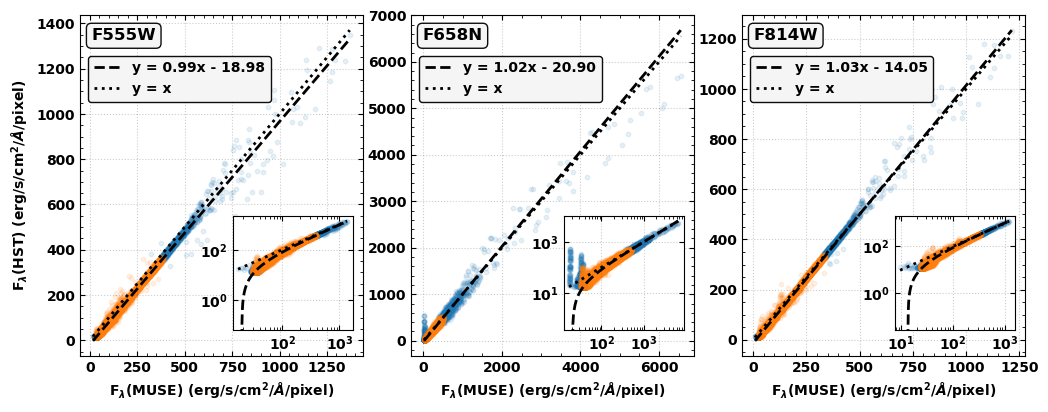

In [8]:
fig = plt.figure(figsize=(10, 3.8))

ax1 = fig.add_subplot(1, 3, 1)
ax3 = fig.add_subplot(1, 3, 2)
ax5 = fig.add_subplot(1, 3, 3)
plt.tight_layout(pad=0.5)

ax2 = fig.add_axes([ax1.get_position().x1-0.13, ax1.get_position().y0+0.07, 0.12, 0.3])
ax4 = fig.add_axes([ax3.get_position().x1-0.13, ax3.get_position().y0+0.07, 0.12, 0.3])
ax6 = fig.add_axes([ax5.get_position().x1-0.13, ax5.get_position().y0+0.07, 0.12, 0.3])

labels  = ['F555W', 'F658N', 'F814W']

def makeplot(ax1, ax2, dict, label):

    for ax in [ax1, ax2]:

        ax.scatter(dict['notfitted_data'][0], dict['notfitted_data'][1], c='C0', alpha=0.1, s=10, rasterized=True)
        ax.scatter(dict['fitted_data'][0], dict['fitted_data'][1], c='C1', alpha=0.1, s=10, rasterized=True)

        a, b = dict['fit_params'][::-1]
        if b < 0:
            b = np.abs(b)
            label_fit = f'y = %0.2fx - %0.2f' %(a,b) 
        else: 
            label_fit = f'y = %0.2fx + %0.2f' %(a,b) 

        ax.plot(dict['fit_data'][0], dict['fit_data'][1], color='k', linewidth=2, linestyle='--', label=label_fit)
        ax.plot(dict['fit_data'][0], dict['fit_data'][0], color='k', linewidth=2, linestyle=':', label=f'y = x')
        
        ax.grid(True, ls=':', color='k', alpha=0.2, which='major')
    
    ax.text(0.04, 0.925, label, transform=ax1.transAxes, bbox=bbox, fontsize=12)

    ax2.set_xscale('log')
    ax2.set_yscale('log')

    ax1.legend(facecolor='whitesmoke', framealpha=0.95, edgecolor='k', bbox_to_anchor=(0.6, 0.8, 0.1, 0.1), loc='upper right')

    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())

    return(ax1, ax2)

makeplot(ax1, ax2, dict_f555w, labels[0])
makeplot(ax3, ax4, dict_f65Xn, labels[1])
makeplot(ax5, ax6, dict_f814w, labels[2])

ax1.set_xlabel('F$_\lambda$(MUSE) (erg/s/cm$^2$/$\AA$/pixel)')
ax3.set_xlabel('F$_\lambda$(MUSE) (erg/s/cm$^2$/$\AA$/pixel)')
ax5.set_xlabel('F$_\lambda$(MUSE) (erg/s/cm$^2$/$\AA$/pixel)')
ax1.set_ylabel('F$_\lambda$(HST) (erg/s/cm$^2$/$\AA$/pixel)')

fig.savefig('./figs/%s_scatter_anchor.pdf' %galaxy, bbox_inches='tight', dpi=150)  

In [9]:
def get_anchoring_halpha(hdu1, hdu2, hdu3, hdu_neb, filter='', make_plots=True):

    hdu1 = hdu1.copy()
    hdu2 = hdu2.copy()
    hdu3 = hdu3.copy()

    data1 = hdu1.data.copy()
    data2 = hdu2.data.copy()

    # Mask zeros 
    mask_zero1 = data1==0
    mask_zero2 = data2==0
    data1[(mask_zero1&mask_zero2)] = np.nan
    data2[(mask_zero1&mask_zero2)] = np.nan

    # Mask with nebmask 
    mask_neb = hdu_neb.data==-1
    data1[mask_neb] = np.nan
    data2[mask_neb] = np.nan

    valid_indices = np.isfinite(data1) & np.isfinite(data2)
    x_data = data1[valid_indices]
    y_data = data2[valid_indices]

    # Mask with STD 
    std = 49.73
    # std = 50
    # std = 34.1
    x_per = np.percentile(x_data, [50-std, 50+std])
    y_per = np.percentile(y_data, [50-std, 50+std])
    # x_per = np.percentile(x_data, [0, 50+std])
    # y_per = np.percentile(y_data, [0, 50+std])
    # x_per = np.percentile(x_data, [0, 100])
    # y_per = np.percentile(y_data, [0, 100])

    x_mask = (x_data>x_per[0])&(x_data<x_per[1])
    y_mask = (y_data>y_per[0])&(y_data<y_per[1])

    # Mask with STD 
    # ratio = y_data/x_data
    # r_mask = (ratio>0.33)&(ratio<1.5)

    x_data_fit = x_data[(x_mask&y_mask)]
    y_data_fit = y_data[(x_mask&y_mask)]

    x_data_nofit = x_data[~(x_mask&y_mask)]
    y_data_nofit = y_data[~(x_mask&y_mask)]

    # valid_indices = np.isfinite(data1) & np.isfinite(data2)
    # x_data = data1[valid_indices]
    # y_data = data2[valid_indices]

    # x_data_fit = x_data
    # y_data_fit = y_data

    # Calculate a line of best fit for the data
    # slope, intercept = np.polyfit(x_data, y_data, 1)
    model_poly = models.Polynomial1D(degree=1)
    fitter_poly = fitting.LinearLSQFitter() 
    best_fit_poly = fitter_poly(model_poly, x_data_fit, y_data_fit)
    intercept, slope = best_fit_poly.parameters

    x_fit = np.linspace(np.min(x_data), np.max(x_data), 10000)
    y_fit = slope * x_fit + intercept
    # print(f"[INFO] xy-fit --- slope: {slope}, intercept: {intercept}")

    # Extract the WCS information from the input and template headers
    wcs1 = wcs.WCS(hdu1.header)
    wcs3 = wcs.WCS(hdu3.header)
    pixscale1 = wcs.utils.proj_plane_pixel_area(wcs1.celestial)
    pixscale3 = wcs.utils.proj_plane_pixel_area(wcs3.celestial)

    pixscale_ratio = (pixscale3 / pixscale1)
    fit = [filter, slope, intercept, intercept*pixscale_ratio]
    print(f"[INFO] xy-fit --- slope: %0.2f, intercept: %0.1f, intercept scaled:  %0.1f" %(slope, intercept, intercept*pixscale_ratio))
    hdu3.data = (hdu3.data - (intercept*pixscale_ratio)) / slope

    output_dict = {'fitted_data': (x_data_fit, y_data_fit), 
                   'notfitted_data': (x_data_nofit, y_data_nofit), 
                   'fit_data': (x_fit, best_fit_poly(x_fit)), 
                   'fit_params': (intercept, slope)}

    return(output_dict)

dict_ha = get_anchoring_halpha(hdu_muse_ha, hdu_muse_contsub, hdu_hst_ha, hdu_muse_neb, 'an_halpha_neb')

[INFO] xy-fit --- slope: 1.19, intercept: -19.8, intercept scaled:  -0.8


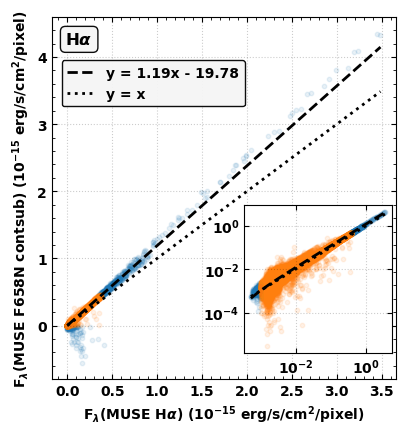

In [35]:
fig = plt.figure(figsize=(4, 4))

ax1 = fig.add_subplot(1, 1, 1)
plt.tight_layout(pad=0.5)

ax2 = fig.add_axes([ax1.get_position().x1-0.38, ax1.get_position().y0+0.065, 0.37, 0.37])

labels  = [r'H$\alpha$']

def makeplot(ax1, ax2, dict, label):

    for ax in [ax1, ax2]:

        ax.scatter(dict['notfitted_data'][0]/1e5, dict['notfitted_data'][1]/1e5, c='C0', alpha=0.1, s=10, rasterized=True)
        ax.scatter(dict['fitted_data'][0]/1e5, dict['fitted_data'][1]/1e5, c='C1', alpha=0.1, s=10, rasterized=True)

        a, b = dict['fit_params'][::-1]
        if b < 0:
            b = np.abs(b)
            label_fit = f'y = %0.2fx - %0.2f' %(a,b) 
        else: 
            label_fit = f'y = %0.2fx + %0.2f' %(a,b) 

        ax.plot(dict['fit_data'][0]/1e5, dict['fit_data'][1]/1e5, color='k', linewidth=2, linestyle='--', label=label_fit)
        ax.plot(dict['fit_data'][0]/1e5, dict['fit_data'][0]/1e5, color='k', linewidth=2, linestyle=':', label=f'y = x')
        
        ax.grid(True, ls=':', color='k', alpha=0.2, which='major')
    
    ax.text(0.04, 0.925, label, transform=ax1.transAxes, bbox=bbox, fontsize=12)

    ax2.set_xscale('log')
    ax2.set_yscale('log')

    ax1.legend(facecolor='whitesmoke', framealpha=0.95, edgecolor='k', bbox_to_anchor=(0.48, 0.8, 0.1, 0.1), loc='upper right')

    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())

    return(ax1, ax2)

makeplot(ax1, ax2, dict_ha, labels[0])

ax1.set_xlabel(r'F$_\lambda$(MUSE H$\alpha$) (10$^{-15}$ erg/s/cm$^2$/pixel)')
ax1.set_ylabel(r'F$_\lambda$(MUSE F658N contsub) (10$^{-15}$ erg/s/cm$^2$/pixel)')

fig.savefig('./figs/%s_scatter_anchor_contsub.pdf' %galaxy, bbox_inches='tight', dpi=150)  

In [30]:
data_muse_total = hdu_muse_ha.data + hdu_muse_nii1.data + hdu_muse_nii2.data
hdu_muse_total = fits.PrimaryHDU(data_muse_total, hdu_muse_ha.header)

dict_ha = get_anchoring_halpha(hdu_muse_total, hdu_muse_contsub, hdu_hst_ha, hdu_muse_neb, 'an_halpha_neb')

[INFO] xy-fit --- slope: 0.85, intercept: -30.8, intercept scaled:  -1.2


In [37]:
hdu_muse_total.writeto('tmp.fits')

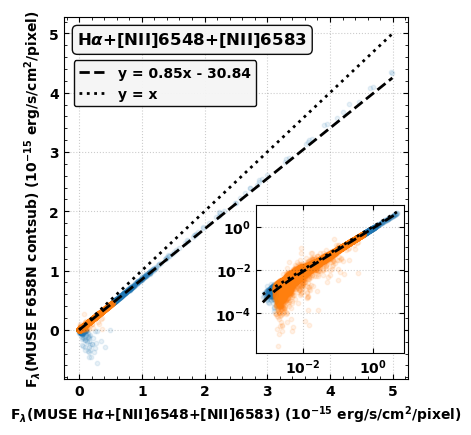

In [35]:
fig = plt.figure(figsize=(4, 4))

ax1 = fig.add_subplot(1, 1, 1)
plt.tight_layout(pad=0.5)

ax2 = fig.add_axes([ax1.get_position().x1-0.38, ax1.get_position().y0+0.065, 0.37, 0.37])

labels  = [r'H$\alpha$+[NII]6548+[NII]6583']

def makeplot(ax1, ax2, dict, label):

    for ax in [ax1, ax2]:

        ax.scatter(dict['notfitted_data'][0]/1e5, dict['notfitted_data'][1]/1e5, c='C0', alpha=0.1, s=10, rasterized=True)
        ax.scatter(dict['fitted_data'][0]/1e5, dict['fitted_data'][1]/1e5, c='C1', alpha=0.1, s=10, rasterized=True)

        a, b = dict['fit_params'][::-1]
        if b < 0:
            b = np.abs(b)
            label_fit = f'y = %0.2fx - %0.2f' %(a,b) 
        else: 
            label_fit = f'y = %0.2fx + %0.2f' %(a,b) 

        ax.plot(dict['fit_data'][0]/1e5, dict['fit_data'][1]/1e5, color='k', linewidth=2, linestyle='--', label=label_fit)
        ax.plot(dict['fit_data'][0]/1e5, dict['fit_data'][0]/1e5, color='k', linewidth=2, linestyle=':', label=f'y = x')
        
        ax.grid(True, ls=':', color='k', alpha=0.2, which='major')
    
    ax.text(0.04, 0.925, label, transform=ax1.transAxes, bbox=bbox, fontsize=12)

    ax2.set_xscale('log')
    ax2.set_yscale('log')

    ax1.legend(facecolor='whitesmoke', framealpha=0.95, edgecolor='k', bbox_to_anchor=(0.48, 0.8, 0.1, 0.1), loc='upper right')

    ax1.xaxis.set_minor_locator(AutoMinorLocator())
    ax1.yaxis.set_minor_locator(AutoMinorLocator())

    return(ax1, ax2)

makeplot(ax1, ax2, dict_ha, labels[0])

ax1.set_xlabel(r'F$_\lambda$(MUSE H$\alpha$+[NII]6548+[NII]6583) (10$^{-15}$ erg/s/cm$^2$/pixel)')
ax1.set_ylabel(r'F$_\lambda$(MUSE F658N contsub) (10$^{-15}$ erg/s/cm$^2$/pixel)')

fig.savefig('./figs/%s_scatter_anchor_NII_contsub.pdf' %galaxy, bbox_inches='tight', dpi=150)  